In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Данные


`survival` Выжил ли пассажир 0 = No, 1 = Yes

`pclass` Класс обслуживания пассажира	1 = 1st, 2 = 2nd, 3 = 3rd

`sex` Пол

`Age` Возраст в годах

`sibsp` Количество братьев, сестер или супругов на борту

`parch` Количество родителей или детей на борту

`ticket` Номер билета

`fare` Тариф

`cabin` Номер каюты

`embarked` Прибыл в порт посадки C = Cherbourg, Q = Queenstown, S = Southampton

In [32]:
from sklearn.model_selection import train_test_split
all_df = pd.read_csv("./train.csv")

train_df, test_df = train_test_split(all_df,  
                                     test_size=0.3, 
                                     stratify=all_df["Survived"],
                                     random_state=84)

In [33]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,623.000000,504.000000,623.000000,623.000000,623.000000
mean,442.746388,0.383628,2.319422,30.045476,0.457464,0.377207,30.874003
std,260.035033,0.486660,0.830909,14.502377,0.964501,0.841409,47.760418
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,218.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,441.000000,0.000000,3.000000,29.000000,0.000000,0.000000,13.500000
75%,668.500000,1.000000,3.000000,39.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          504 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     621 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


* float64(2): Fare,  Age
* int64(5): Pclass, sibsp, parch, passengerId and survived
* object(5): Cabin, embarked, ticket, name and sex

## Категориальные переменные

In [7]:
def bar_plot(variable):

    variable = train_df[variable]
    variable_value = variable.value_counts() 

    plt.figure(figsize = (9, 3))
    plt.bar(variable_value.index, variable_value)
    plt.xticks(variable_value.index, variable_value.index.values)
    plt.ylabel("Частота")
    plt.title(variable.name)
    plt.show()
    print("{}: \n {}".format(variable.name, variable_value))

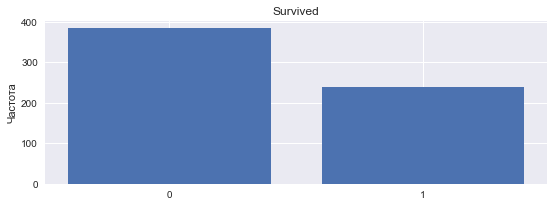

Survived: 
 0    384
1    239
Name: Survived, dtype: int64


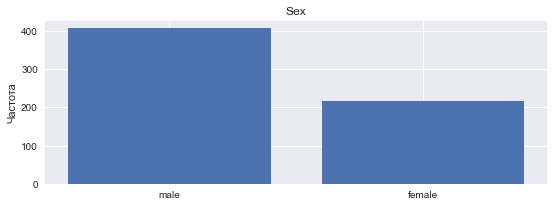

Sex: 
 male      406
female    217
Name: Sex, dtype: int64


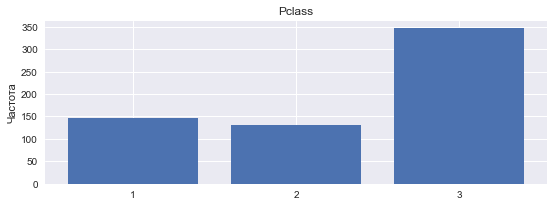

Pclass: 
 3    346
1    147
2    130
Name: Pclass, dtype: int64


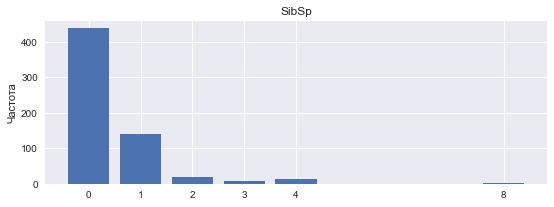

SibSp: 
 0    437
1    141
2     20
4     14
3      8
8      3
Name: SibSp, dtype: int64


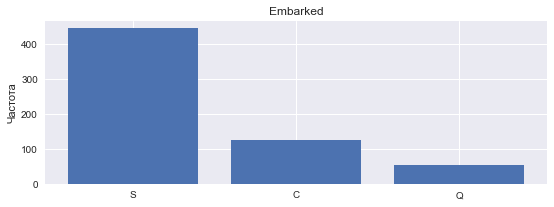

Embarked: 
 S    444
C    124
Q     53
Name: Embarked, dtype: int64


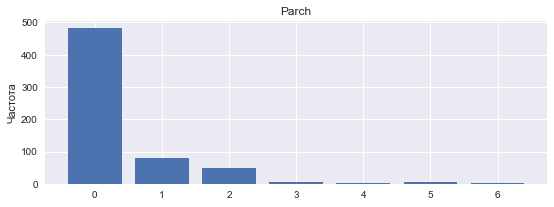

Parch: 
 0    481
1     79
2     49
3      5
5      5
4      3
6      1
Name: Parch, dtype: int64


In [8]:
categorical_features = ["Survived", "Sex", "Pclass", "SibSp", "Embarked", "Parch"]
for c in categorical_features:
    bar_plot(c)

In [9]:
categorical_features2 = ["Cabin", "Name", "Ticket"]
for c in categorical_features2:
    print("{} \n".format(train_df[c].value_counts()))

F33      3
G6       3
D33      2
D        2
D17      2
        ..
F G73    1
C104     1
C32      1
A7       1
D47      1
Name: Cabin, Length: 113, dtype: int64 

Marvin, Mr. Daniel Warner                                                             1
Ryerson, Miss. Emily Borie                                                            1
Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)    1
Keefe, Mr. Arthur                                                                     1
Byles, Rev. Thomas Roussel Davids                                                     1
                                                                                     ..
Hoyt, Mr. Frederick Maxfield                                                          1
Bazzani, Miss. Albina                                                                 1
Dakic, Mr. Branko                                                                     1
Drew, Mrs. James Vivian (Lulu Thorne Christian

## Численные переменные


In [10]:
def plot_hist(variable):
    plt.figure(figsize = (8, 3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Частота")
    plt.title("{} распределение".format(variable))
    plt.show()

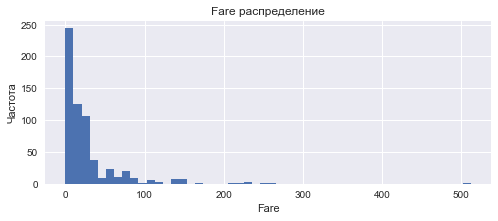

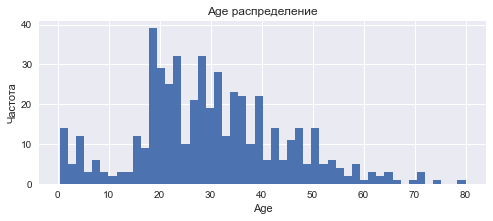

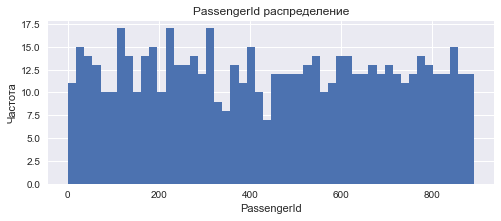

In [11]:
numeric_variable = ["Fare", "Age", "PassengerId"]
for n in numeric_variable:
    plot_hist(n)

#### Pclass vs Survived

In [12]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.639456
1,2,0.453846
2,3,0.248555


#### Sex - Survived

In [13]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.751152
1,male,0.187192


In [14]:
len(train_df[train_df["Sex"]=="female"]), len(train_df[train_df["Sex"]=="male"])

(217, 406)

#### SibSp - Survived

In [15]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
2,2,0.550000
1,1,0.510638
0,0,0.350114
4,4,0.142857
3,3,0.125000
5,8,0.000000


#### Parch - Survived

In [16]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index= False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
2,2,0.612245
3,3,0.600000
1,1,0.531646
0,0,0.338877
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Визуализация


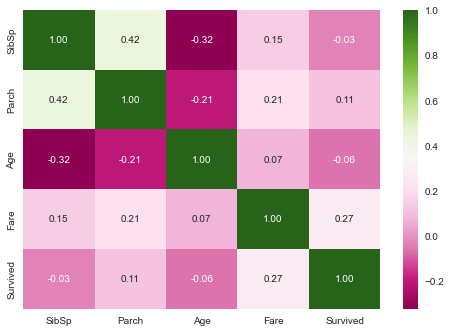

In [85]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f", cmap="PiYG")
plt.show()

### SibSp -- Survived
<a id="13"></a>

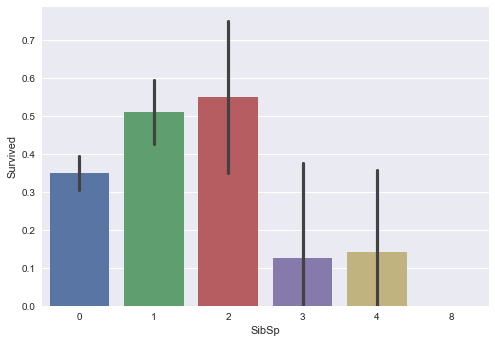

In [18]:
g = sns.barplot(x = "SibSp", y = "Survived", data = train_df)
plt.show()

### Parch -- Survived
<a id="14"></a>

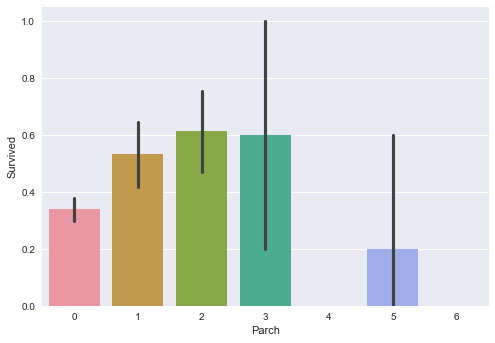

In [19]:
g = sns.barplot(x = "Parch", y = "Survived", data = train_df)
plt.show()

### Pclass -- Survived
<a id="15"></a>

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

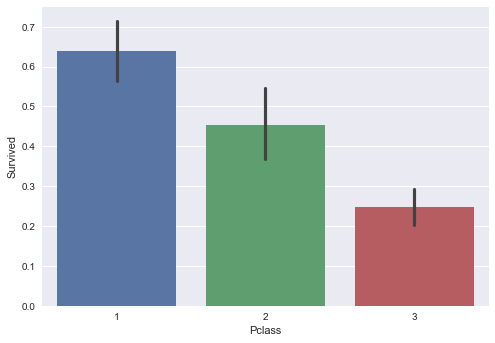

In [20]:
sns.barplot(x = "Pclass", y = "Survived", data = train_df)

### Age -- Survived
<a id="16"></a>

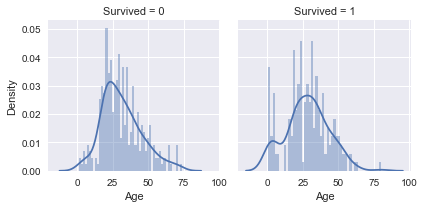

In [21]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 50) 
plt.show()

### Pclass -- Survived -- Age
<a id="17"></a>

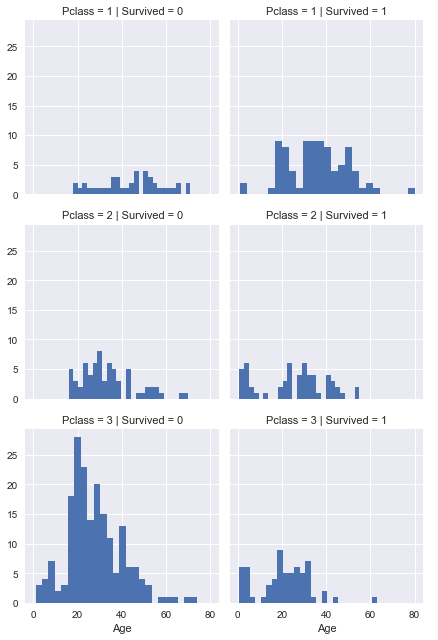

In [22]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

### Embarked -- Sex -- Pclass -- Survived
<a id="18"></a>

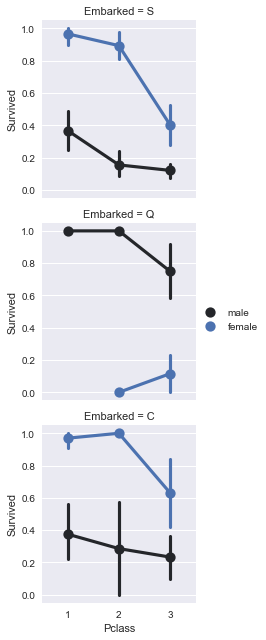

In [24]:
g = sns.FacetGrid(train_df, row = "Embarked") 
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

### Embarked -- Sex -- Fare -- Survived
<a id="19"></a>

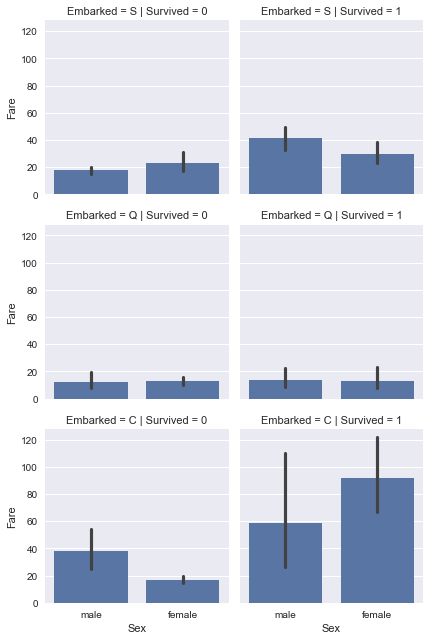

In [25]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived") 
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

In [7]:
train_df.drop(labels=["PassengerId"], axis=1, inplace=True) 

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
748,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
45,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
403,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S


In [35]:
#for categorical variables
def cat(t):
    feat=["Pclass","Sex","SibSp","Parch",'Embarked']
    t=t[feat]
    return t

#for numerical variables
def num(t):
    feat=['Age','Ticket','Fare']
    t=t[feat]
    t['Ticket']=t['Ticket'].replace('[^\d]+', '', regex=True)
    t['Ticket'] = t['Ticket'].str.strip()
    t['Ticket'] = t['Ticket'].replace('', np.nan)
    t['Ticket'] = t['Ticket'].astype(float)
    return t

features = list(["Pclass","Sex","SibSp","Parch",'Embarked']) + list(['Age','Ticket','Fare'])

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

pipe_cat = Pipeline([
    ('cat',FunctionTransformer(cat)),
    ('enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
    ('imputer',SimpleImputer(strategy='mean',missing_values=np.NaN))
])

pipe_num = Pipeline([
    ('num', FunctionTransformer(num)),
    ('imputer',SimpleImputer(strategy='mean',missing_values=np.NaN))
])

full_pipe = FeatureUnion(transformer_list=[('cat',pipe_cat),('num',pipe_num)])

In [37]:
from sklearn.model_selection import train_test_split

X_train_full = full_pipe.fit_transform(train_df)
X_train_full = pd.DataFrame(X_train_full)
X_train_full.columns = features 
X_test = full_pipe.transform(test_df)
X_test = pd.DataFrame(X_test)
X_test.columns = features

y_test = test_df["Survived"]

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      train_df["Survived"], 
                                                      test_size=0.3, 
                                                      stratify=train_df["Survived"],
                                                      random_state=42)

# Моделирование

In [38]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random


from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm

random.seed(42)

## LDA

In [39]:
from statsmodels.multivariate.manova import MANOVA
#'Pclass + Sex + SibSp + Parch + Embarked + Age + Ticket + Fare'
maov=MANOVA.from_formula('Pclass + Sex + SibSp + Parch + Embarked + Age + Fare  ~ Survived', data=train_df)
print(maov.mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF          F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 9.0000 490.0000 -15324748732024660.0000 1.0000
         Pillai's trace                1.0000 9.0000 490.0000 -15324748732024658.0000 1.0000
 Hotelling-Lawley trace -281474976710657.0000 9.0000 490.0000 -15324748732024660.0000 1.0000
    Roy's greatest root -281474976710657.0000 9.0000 490.0000 -15324748732024658.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

In [40]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
lda_pred_valid = model_lda.predict(X_valid)
val_score = roc_auc_score(y_valid, lda_pred_valid)
print(val_score)

0.7420289855072463


In [43]:
solver = 'svd', 'lsqr', 'eigen'
priors = None, np.array([0.6, 0.4])
for i in ['svd', 'lsqr', 'eigen']:
    for k in [None, np.array([0.6, 0.4])]:
        model_lda = LinearDiscriminantAnalysis(solver=i,
                                               priors=k)
        model_lda.fit(X_train, y_train)
        lda_pred_valid = model_lda.predict(X_valid)
        print((i, k), roc_auc_score(y_valid, lda_pred_valid))


('svd', None) 0.7420289855072463
('svd', array([0.6, 0.4])) 0.7559178743961352
('lsqr', None) 0.7420289855072463
('lsqr', array([0.6, 0.4])) 0.7559178743961352
('eigen', None) 0.7420289855072463
('eigen', array([0.6, 0.4])) 0.7559178743961352


In [61]:
model_lda = LinearDiscriminantAnalysis(priors=np.array([0.6, 0.4]))
model_lda.fit(X_train, y_train)
lda_pred_val = model_lda.predict(X_valid)
val_score = roc_auc_score(y_valid, lda_pred_val)
print(roc_auc_score(y_valid, lda_pred_val))

0.7559178743961352


In [45]:
model_lda = LinearDiscriminantAnalysis(priors=np.array([0.6, 0.4]))
model_lda.fit(X_train, y_train)
lda_pred_test = model_lda.predict(X_test)
test_score = roc_auc_score(y_test, lda_pred_test)
print(roc_auc_score(y_test, lda_pred_test))

0.797411003236246


In [46]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(model_lda, X_train_full, train_df["Survived"], scoring='roc_auc', cv=cv, n_jobs=3)
cv_score = np.mean(scores)
print(np.mean(scores)) 

0.8544119557032491


In [49]:
results = pd.DataFrame({"model":"LDA", "val_score":val_score, "cross_val_score":cv_score, "test_score":test_score}, index=[0])
results

,model,val_score,cross_val_score,test_score
0,LDA,0.755918,0.854412,0.797411


<AxesSubplot:>

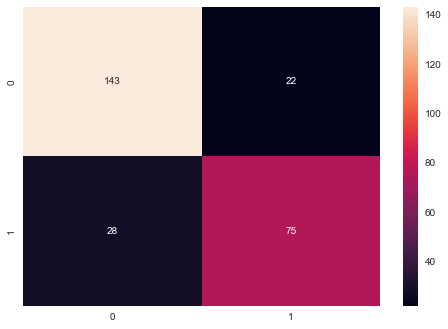

In [50]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sb
conf_matrix = confusion_matrix(y_test, lda_pred_test)
sb.heatmap(conf_matrix, annot=True, fmt="d")

## QDA

In [62]:
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, y_train)
qda_pred_valid = model_qda.predict(X_valid)
val_score = roc_auc_score(y_valid, lda_pred_valid)
print(val_score)

0.7559178743961352


In [55]:
for i in list(np.linspace(0, 1, num=9)):
    model_qda = QuadraticDiscriminantAnalysis(reg_param=i)
    model_qda.fit(X_train, y_train)
    qda_pred_valid = model_qda.predict(X_valid)
    print((i), roc_auc_score(y_valid, qda_pred_valid))


0.0 0.7376811594202898
0.125 0.6769927536231883
0.25 0.6353260869565218
0.375 0.6422705314009661
0.5 0.6518115942028986
0.625 0.6405193236714976
0.75 0.6387681159420291
0.875 0.5891908212560386
1.0 0.48091787439613526


In [57]:
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, y_train)
qda_pred_test = model_qda.predict(X_test)
test_score = roc_auc_score(y_test, qda_pred_test)
print(roc_auc_score(y_test, qda_pred_test))

0.8016475433951162


In [58]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(model_qda, X_train_full, train_df["Survived"], scoring='roc_auc', cv=cv, n_jobs=3)
cv_score = np.mean(scores)
print(np.mean(scores)) 

0.8364627164704154


In [59]:
results_new = pd.DataFrame({"model":"QDA", "val_score":val_score, "cross_val_score":cv_score, "test_score":test_score}, index=[0])
results = pd.concat([results, results_new], ignore_index=True)

In [60]:
results

,model,val_score,cross_val_score,test_score
0,LDA,0.755918,0.854412,0.797411
1,QDA,0.755918,0.836463,0.801648


<AxesSubplot:>

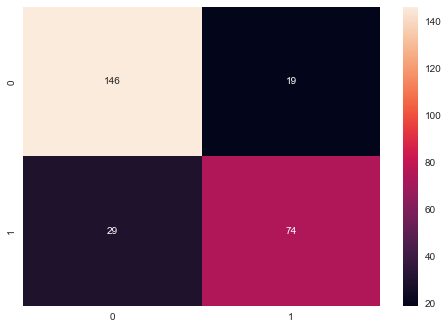

In [63]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sb
conf_matrix = confusion_matrix(y_test, qda_pred_test)
sb.heatmap(conf_matrix, annot=True, fmt="d")

## SVM

In [64]:
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
svm_pred_valid = model_svm.predict(X_valid)
val_score = roc_auc_score(y_valid, svm_pred_valid)
print(val_score)

0.5


In [27]:
#from sklearn.model_selection import GridSearchCV
#model_svm = svm.SVC()
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#              'gamma': [1, 0.1],
#              'kernel': ['poly', 'rbf', 'sigmoid']}
#grid = GridSearchCV(model_svm, param_grid)

In [65]:
for c in [0.1, 1, 10, 100, 1000]:
    for gamma in [1, 0.1]:
        for kernel in ['poly', 'rbf', 'sigmoid']:
            model_svm = svm.SVC(gamma=gamma, kernel=kernel, C=c)
            model_svm.fit(X_train, y_train)
            svm_pred_valid = model_svm.predict(X_valid)
            print((c, gamma, kernel), roc_auc_score(y_valid, svm_pred_valid))

(0.1, 1, 'poly') 0.5405193236714976
(0.1, 1, 'rbf') 0.5
(0.1, 1, 'sigmoid') 0.5
(0.1, 0.1, 'poly') 0.5405193236714976
(0.1, 0.1, 'rbf') 0.5
(0.1, 0.1, 'sigmoid') 0.5
(1, 1, 'poly') 0.5405193236714976
(1, 1, 'rbf') 0.5208333333333334
(1, 1, 'sigmoid') 0.5
(1, 0.1, 'poly') 0.5405193236714976
(1, 0.1, 'rbf') 0.5720410628019323
(1, 0.1, 'sigmoid') 0.5
(10, 1, 'poly') 0.5405193236714976
(10, 1, 'rbf') 0.5373188405797101
(10, 1, 'sigmoid') 0.5
(10, 0.1, 'poly') 0.5405193236714976
(10, 0.1, 'rbf') 0.5746376811594204
(10, 0.1, 'sigmoid') 0.5
(100, 1, 'poly') 0.5405193236714976
(100, 1, 'rbf') 0.5373188405797101
(100, 1, 'sigmoid') 0.5
(100, 0.1, 'poly') 0.5405193236714976
(100, 0.1, 'rbf') 0.5746376811594204
(100, 0.1, 'sigmoid') 0.5
(1000, 1, 'poly') 0.5405193236714976
(1000, 1, 'rbf') 0.5373188405797101
(1000, 1, 'sigmoid') 0.5
(1000, 0.1, 'poly') 0.5405193236714976
(1000, 0.1, 'rbf') 0.5746376811594204
(1000, 0.1, 'sigmoid') 0.5


In [66]:
model_svm = svm.SVC(kernel="rbf", gamma=0.1)
model_svm.fit(X_train, y_train)
svm_pred_valid = model_svm.predict(X_valid)
val_score = roc_auc_score(y_valid, svm_pred_valid)
print(val_score)

0.5720410628019323


In [67]:
model_svm = svm.SVC(kernel="poly", gamma=0.1)
model_svm.fit(X_train, y_train)
svm_pred_test = model_svm.predict(X_test)
test_score = roc_auc_score(y_test, svm_pred_test)
print(roc_auc_score(y_test, svm_pred_test))

0.5760223595175051


In [68]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(model_svm, X_train_full, train_df["Survived"], scoring='roc_auc', cv=cv, n_jobs=3)
cv_score = np.mean(scores)
print(np.mean(scores)) 

0.6136809878096272


In [69]:
results_new = pd.DataFrame({"model":"SVM", "val_score":val_score, "cross_val_score":cv_score, "test_score":test_score}, index=[0])
results = pd.concat([results, results_new], ignore_index=True)

In [70]:
results

,model,val_score,cross_val_score,test_score
0,LDA,0.755918,0.854412,0.797411
1,QDA,0.755918,0.836463,0.801648
2,SVM,0.572041,0.613681,0.576022


<AxesSubplot:>

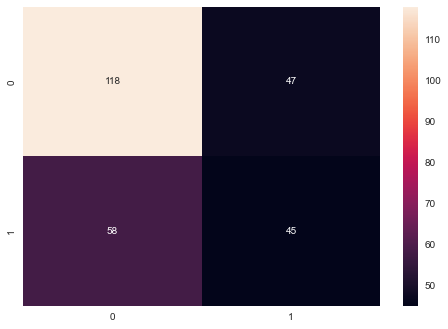

In [71]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sb
conf_matrix = confusion_matrix(y_test, svm_pred_test)
sb.heatmap(conf_matrix, annot=True, fmt="d")

# Логистическая регрессия

`Просто пример, как с помощью линейной модели хорошо работать с нелинейными зависимостями`

<AxesSubplot:xlabel='x1', ylabel='x2'>

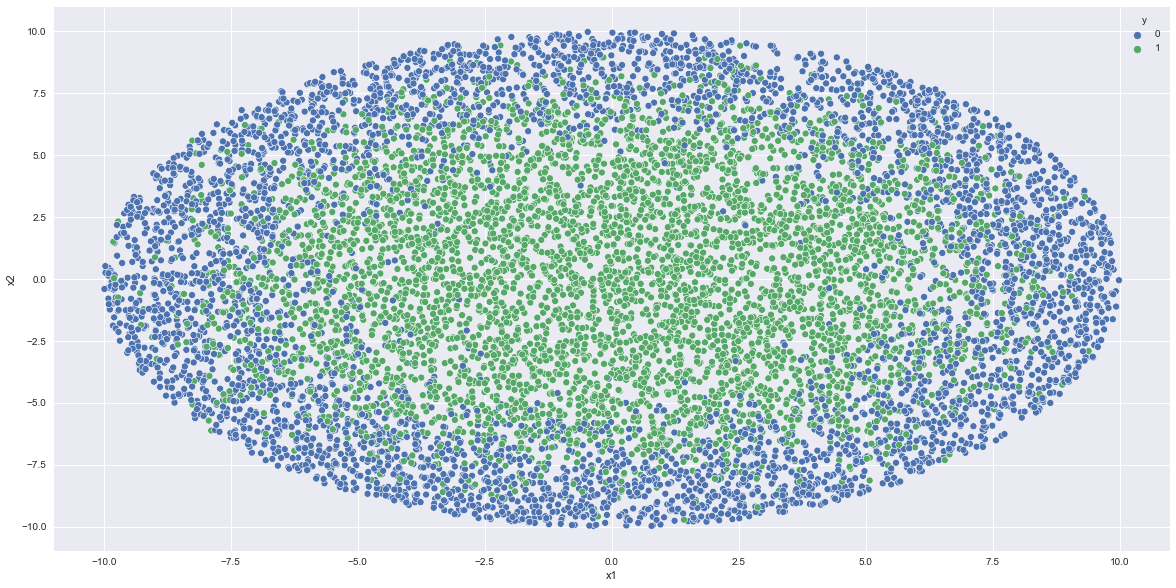

In [52]:
df = pd.read_csv('data (1).csv',index_col=0)
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

Точность нашей модели 0.5666666666666667


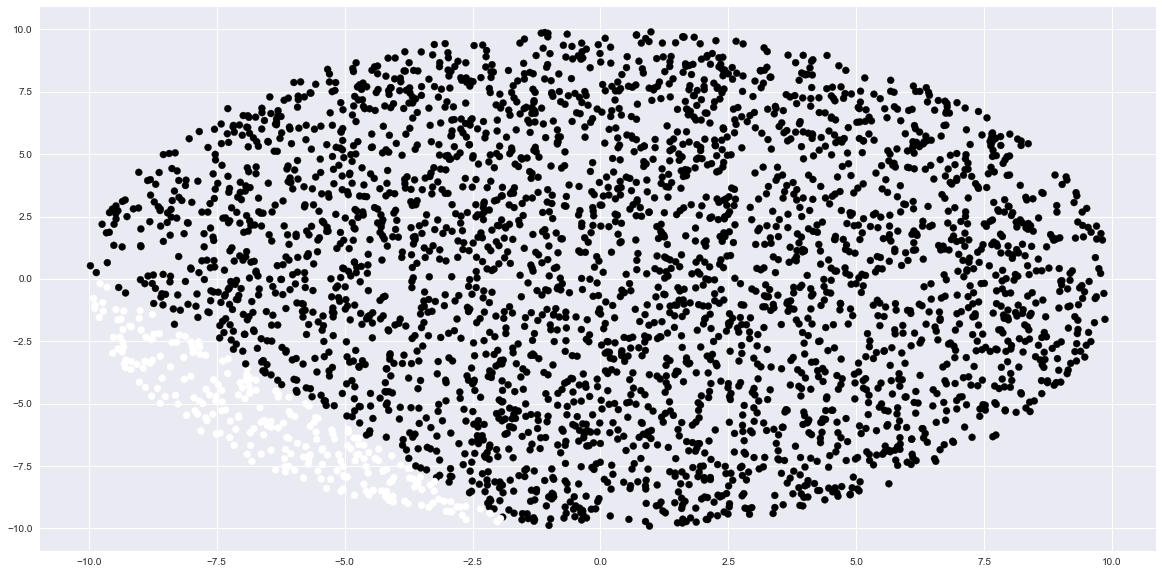

In [55]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

X_train_example, X_test_example, y_train_example, y_test_example = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_example, y_train_example)
predict_logit =  model.predict(X_test_example)

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test_example)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_example['x1'], X_test_example['x2'], c=predict_logit)
plt.show()

Точность нашей модели 0.8421212121212122


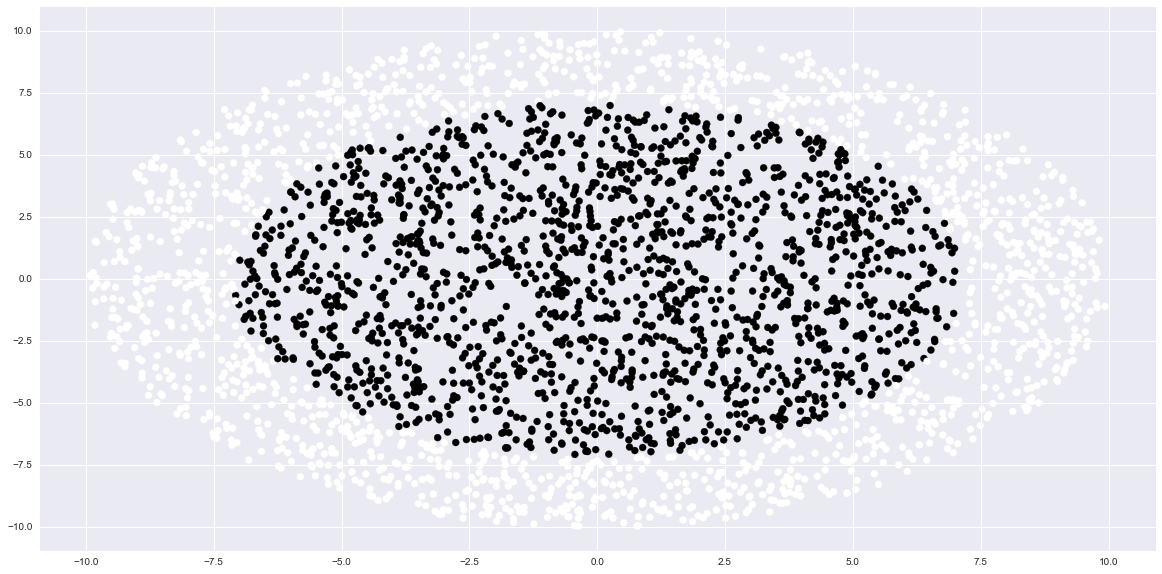

In [57]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

df['x3'] = df['x1']**2 + df['x2']**2
X_train_example, X_test_example, y_train_example, y_test_example = train_test_split(df[['x1','x2', 'x3']], df['y'], test_size = 0.33)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_example, y_train_example)
predict_logit =  model.predict(X_test_example)

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test_example)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_example['x1'], X_test_example['x2'], c=predict_logit)
plt.show()

`обратно к моделированию`

In [73]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
lr_pred_valid = model_svm.predict(X_valid)
val_score = roc_auc_score(y_valid, lr_pred_valid)
print(val_score)

0.5405193236714976


In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
model_lr = LogisticRegression()
clf = GridSearchCV(model_lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=3, scoring="roc_auc")

In [75]:
best_clf = clf.fit(X_train_full, train_df["Survived"])

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [76]:
best_clf.best_params_

{'C': 1.623776739188721,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [77]:
model_lr = LogisticRegression(**best_clf.best_params_)
model_lr.fit(X_train, y_train)
lr_pred_valid = model_lr.predict(X_valid)
val_score = roc_auc_score(y_valid, lr_pred_valid)
print(val_score)

0.7481280193236715


In [78]:
model_lr = LogisticRegression(**best_clf.best_params_)
model_lr.fit(X_train, y_train)
lr_pred_test = model_lr.predict(X_test)
test_score = roc_auc_score(y_test, lr_pred_test)
print(roc_auc_score(y_test, lr_pred_test))

0.7986172403648133


In [79]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(model_lr, X_train_full, train_df["Survived"], scoring='roc_auc', cv=cv, n_jobs=3)
cv_score = np.mean(scores)
print(np.mean(scores)) 

0.8526566355443735


In [80]:
## Результаты 

results_new = pd.DataFrame({"model":"Logistic regression", "val_score":val_score, "cross_val_score":cv_score, "test_score":test_score}, index=[0])
results = pd.concat([results, results_new], ignore_index=True)

In [81]:
results

,model,val_score,cross_val_score,test_score
0,LDA,0.755918,0.854412,0.797411
1,QDA,0.755918,0.836463,0.801648
2,SVM,0.572041,0.613681,0.576022
3,Logistic regression,0.748128,0.852657,0.798617


<AxesSubplot:>

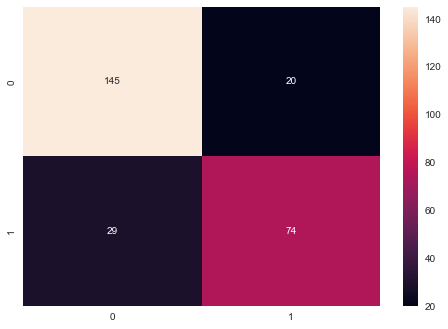

In [82]:
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sb
conf_matrix = confusion_matrix(y_test, lr_pred_test)
sb.heatmap(conf_matrix, annot=True, fmt="d")

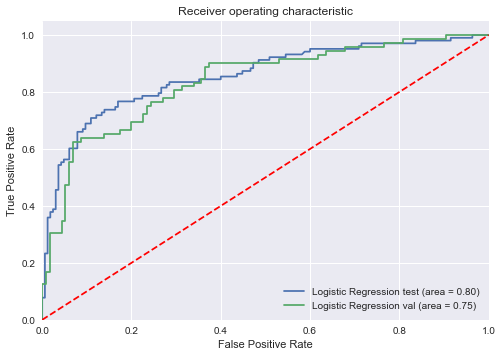

In [89]:
from sklearn.metrics import roc_curve
plt.figure()
logit_roc_auc = roc_auc_score(y_test, lr_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression test (area = %0.2f)' % logit_roc_auc)
logit_roc_auc = roc_auc_score(y_valid, lr_pred_valid)
fpr, tpr, thresholds = roc_curve(y_valid, model_lr.predict_proba(X_valid)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression val (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Другой датасет